## Load Packages

In [1]:
using Pkg
Pkg.add("TimeSeries")
Pkg.add("Distributions")
Pkg.add("Plots")
Pkg.add("StatsBase")
Pkg.add("Dates")
using TimeSeries, DelimitedFiles, Distributions, Dates, DataFrames

include("./printmat.jl")


using Plots
# gr(size=(600,400))
#pyplot(size=(600,400))    
gr(size=(480,320))
default(fmt = :svg)

 Resolving package versions...


  Updating `~/.julia/environment/v1.2/Project.toml`
 [no changes]
  Updating

 `~/.julia/environment/v1.2/Manifest.toml`
 [no changes]


 Resolving package versions...


  Updating `~/.julia/environment/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environment/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...


  Updating `~/.julia/environment/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environment/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...


  Updating `~/.julia/environment/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environment/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...


  Updating `~/.julia/environment/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environment/v1.2/Manifest.toml`
 [no changes]


# Time Series Analysis
In this problem set we will manipulate time series and perform simple transformations thereof. The following cell will load a time series of Morgan Stanley's, Tesla's and Microsoft's stock price data. Make sure you've put file `TeslaMsMsft.csv` in folder `Data`.

In [2]:
# Load data
tm = readtimearray("./Data/MsTeslaMsft.csv", format="dd/mm/yyyy", delim=',');
tx = readdlm("./Data/MsTeslaMsft.csv",',',skipstart=1)
stock_t = tm[:MS,:TSLA,:MSFT]; # t...time series object
stock_f = convert(Array{Float64}, tx[:,2:4]);  # f...floating array object
tm

2124×3 TimeArray{Float64,2,Date,Array{Float64,2}} 2011-01-03 to 2019-06-28
│            │ TSLA   │ MS    │ MSFT   │
├────────────┼────────┼───────┼────────┤
│ 2011-01-03 │ 26.62  │ 28.23 │ 27.98  │
│ 2011-01-04 │ 26.67  │ 28.47 │ 28.09  │
│ 2011-01-05 │ 26.83  │ 28.83 │ 28.0   │
│ 2011-01-06 │ 27.88  │ 28.8  │ 28.82  │
│ 2011-01-07 │ 28.24  │ 28.2  │ 28.6   │
│ 2011-01-10 │ 28.45  │ 28.05 │ 28.22  │
│ 2011-01-11 │ 26.96  │ 27.96 │ 28.11  │
│ 2011-01-12 │ 26.96  │ 28.71 │ 28.55  │
│ 2011-01-13 │ 26.22  │ 28.3  │ 28.19  │
│ 2011-01-14 │ 25.75  │ 28.98 │ 28.3   │
│ 2011-01-18 │ 25.64  │ 28.75 │ 28.66  │
│ 2011-01-19 │ 24.03  │ 27.75 │ 28.47  │
   ⋮
│ 2019-06-14 │ 214.92 │ 42.82 │ 132.45 │
│ 2019-06-17 │ 225.03 │ 42.51 │ 132.85 │
│ 2019-06-18 │ 224.74 │ 43.34 │ 135.16 │
│ 2019-06-19 │ 226.43 │ 43.14 │ 135.69 │
│ 2019-06-20 │ 219.62 │ 43.46 │ 136.95 │
│ 2019-06-21 │ 221.86 │ 43.58 │ 136.97 │
│ 2019-06-24 │ 223.64 │ 43.07 │ 137.78 │
│ 2019-06-25 │ 219.76 │ 42.66 │ 133.43 │
│ 2019-06-26 │ 219

# Task 1 (25 points)
Calculate log-returns of an equally weighted portfolio containing each stock at every point in time as *percent per day* (that is, a 5.5% return on some day should be expressed as 5.5 and not as 0.055), print out 10 the first and the 10 last observations thereof and plot the whole series on the timeline. Use a ``TimeArray`` object for these computations and the function ``percentchange()``.

In [3]:
tarr = percentchange(stock_t,:log) #calculate daily log returns
tindiv = tarr .* (1/size(stock_t,2)) #contribution to total portfolio return by stock

2123×3 TimeArray{Float64,2,Date,Array{Float64,2}} 2011-01-04 to 2019-06-28
│            │ MS      │ TSLA    │ MSFT    │
├────────────┼─────────┼─────────┼─────────┤
│ 2011-01-04 │ 0.0028  │ 0.0006  │ 0.0013  │
│ 2011-01-05 │ 0.0042  │ 0.002   │ -0.0011 │
│ 2011-01-06 │ -0.0003 │ 0.0128  │ 0.0096  │
│ 2011-01-07 │ -0.007  │ 0.0043  │ -0.0026 │
│ 2011-01-10 │ -0.0018 │ 0.0025  │ -0.0045 │
│ 2011-01-11 │ -0.0011 │ -0.0179 │ -0.0013 │
│ 2011-01-12 │ 0.0088  │ 0.0     │ 0.0052  │
│ 2011-01-13 │ -0.0048 │ -0.0093 │ -0.0042 │
│ 2011-01-14 │ 0.0079  │ -0.006  │ 0.0013  │
│ 2011-01-18 │ -0.0027 │ -0.0014 │ 0.0042  │
│ 2011-01-19 │ -0.0118 │ -0.0216 │ -0.0022 │
│ 2011-01-20 │ 0.0149  │ -0.0202 │ -0.0014 │
   ⋮
│ 2019-06-14 │ -0.001  │ 0.0016  │ 0.0003  │
│ 2019-06-17 │ -0.0024 │ 0.0153  │ 0.001   │
│ 2019-06-18 │ 0.0064  │ -0.0004 │ 0.0057  │
│ 2019-06-19 │ -0.0015 │ 0.0025  │ 0.0013  │
│ 2019-06-20 │ 0.0025  │ -0.0102 │ 0.0031  │
│ 2019-06-21 │ 0.0009  │ 0.0034  │ 0.0     │
│ 2019-06-24 │ -0.00

In [7]:
dates = timestamp(tindiv)
vals = (sum(tindiv,dims=2)).*100
valdf = DataFrame(vals) #convert TimeArray to DataFrame
colnames = String["Equally-Weighted Portfolio"]
tport = TimeArray(dates, valdf[:,2], colnames)

k = 10 #to display first and last 10 values
display(TimeSeries.head(tport,k))
display(TimeSeries.tail(tport,k))

10×1 TimeArray{Float64,1,Date,Array{Float64,1}} 2011-01-04 to 2011-01-18
│            │ Equally-Weighted Portfolio │
├────────────┼────────────────────────────┤
│ 2011-01-04 │ 0.4755                     │
│ 2011-01-05 │ 0.5113                     │
│ 2011-01-06 │ 2.2071                     │
│ 2011-01-07 │ -0.5295                    │
│ 2011-01-10 │ -0.3767                    │
│ 2011-01-11 │ -2.0304                    │
│ 2011-01-12 │ 1.4001                     │
│ 2011-01-13 │ -1.8302                    │
│ 2011-01-14 │ 0.3184                     │
│ 2011-01-18 │ 0.013                      │

10×1 TimeArray{Float64,1,Date,Array{Float64,1}} 2019-06-17 to 2019-06-28
│            │ Equally-Weighted Portfolio │
├────────────┼────────────────────────────┤
│ 2019-06-17 │ 1.3906                     │
│ 2019-06-18 │ 1.1762                     │
│ 2019-06-19 │ 0.226                      │
│ 2019-06-20 │ -0.4635                    │
│ 2019-06-21 │ 0.435                      │
│ 2019-06-24 │ 0.0705                     │
│ 2019-06-25 │ -1.9716                    │
│ 2019-06-26 │ 0.3071                     │
│ 2019-06-27 │ 0.9785                     │
│ 2019-06-28 │ 0.2897                     │

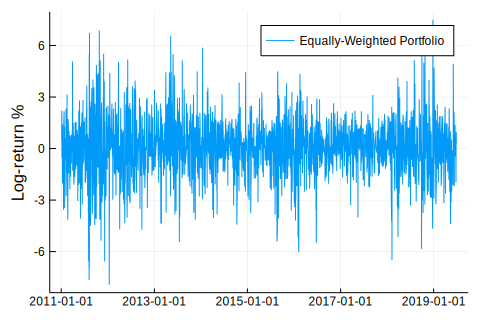

In [10]:
function prettyplot(ta::TimeArray)
    plot(ta, lw=1.0, ylabel="Log-return %")
end

prettyplot(tport)

# Task 2 (15 points)
Calculate the average daily return of the portfolio that you constructed in **Task 1** (in percent per day) on Wednesdays before and after 2015-06-03 (you can include this date in both samples).

Hint: use the time series object that you have created in **Task 1**.

In [65]:
tw = when(tport,dayofweek,3)

tw1 = to(tw, Date(2015, 6, 3))
tw2 = from(tw, Date(2015, 6, 3))

tw1avg = mean(tw1)
tw2avg = mean(tw2)

tw1f = DataFrame(tw1avg)
tw2f = DataFrame(tw2avg)

printblue("                   Average daily return")
printlnPs("Before 2015-06-03: ",tw1f[:,2])
printlnPs("After 2015-06-03:  ",tw2f[:,2])

                   Average daily return
Before 2015-06-03:     -0.110
After 2015-06-03:       0.166


# Task 3 (30 points)

## Part a)

Write a function that will the calculate rolling downside standard deviation defined as follows:

$ \sigma_{d} = \sqrt{\frac{1}{N_{d}} \sum_{t \in \Omega_{d}} (r_t - \bar{r})^2}, $

where $ \Omega_d $ is the set of dates when the returns was below the **minimum acceptable return (MAR)**, and $ N_d $ is the number of such days. $\bar{r} = E[r_t] $ should be estimated as the sample mean without the restriction of only looking at negative returns (calculated in a rolling fashion, using a window of **252 days**). As an illustratrive example, compare to the Sortino ratio where $\sigma_{d}$ is calculated using $r_{MAR}$ instead of $\bar{r}$, [see](https://de.wikipedia.org/wiki/Sortino-Verh%C3%A4ltnis) - note that the Sortino ratio is different from the rolling downside standard deviation that you are required to calculate in this example.

Hint 1: First, try experimenting with a MAR of 0.0%.

Hint 2: Use the floating array object ``stocks_f`` to calculate the return on the equally weighted portfolio across the three stocks.

Hing 3: Use a loop to calculate the downside standard deviation in a rolling fashion.

```
# Define downside standard deviation
function downside_std()
    # compute mean of the whole array
    # std conditional on sign
    return std_d
end

# Define windown length and create a vector of different MAR values
window = ??
MAR    = ??

# Calculate the rolling downside standard deviation
# Prelocate output vector
for m = ??
    Hint: use if statement to collect conventional and downside (rolling) standard deviation in one matrix
    downside_std(). 
end
```

In [0]:
# Define downside standard deviation

stock_returns = (stock_f[2:end,:] ./ stock_f[1:end-1]) .- 1
port_r = mean(stock_returns,dims =2)


function downside_std(x,y)
    rhat = mean(port_r) # compute mean of the whole array
    std_d = sqrt(1 ./ size(findall(tport["Equally-Weighted Portfolio"] .< y),1) .* sum())
    return std_d
end

# Define window length and create a vector of different MAR values
window = 252
MAR    = 0.0

# Calculate the rolling downside standard deviation
# Prelocate output vector
for m = 1:
    Hint: use if statement to collect conventional and downside (rolling) standard deviation in one matrix
    downside_std(). 
end

In [66]:
size(findall(tport["Equally-Weighted Portfolio"] .< 0),1)

┌ Warning: `getindex(ta::TimeArray, s::AbstractString)` is deprecated, use `getindex(ta, Symbol(s))` instead.
│   caller = top-level scope at In[66]:1
└ @ Core In[66]:1


1000

## Part b)
Plot the 252-day rolling downside standard deviation versus the 252-day rolling conventional standard deviation. For $MAR = [0\%, -0.5\%, -1.5\%]$. Convert log returns to percentages by multiplying them with 100. 

Hint 1: use ``stocks_f`` to calculate the return on an equally weighted portfolio across the three stocks for both the conventional rolling standard deviation and for the rolling downside standard deviation.

Hint 2: to create a date axis, use ``Date.(??,"dd/mm/yyyy")``.

# Task 4 (10 points)
Calculate a time series of weekly median, mean, maxima and minima of daily portfolio returns. Index the new series by the beginning of the week. So, the output for the median should resemble this (column names are arbitrary), and similarly for the minimum and maximum:

| date       | value |
| ----       | ----- |
| ...        | ...   |
| 2015-12-28 | [median of December 2015 Week4 daily returns] |
| 2016-01-04 | [median of January 2016 Week1 daily returns] |
| ...        | ...   |

Plot the result on the timeline.

Hint: apply the function ``collapse()`` to time series object. This can be useful when dealing with different rebalancing frequencies for trading strategies.

In [7]:
twkmed = TimeSeries.rename(collapse(tport,week,first,median), :Median)
twkavg = TimeSeries.rename(collapse(tport,week,first,mean), :Mean)
twkmax = TimeSeries.rename(collapse(tport,week,first,maximum), :Max)
twkmin = TimeSeries.rename(collapse(tport,week,first,minimum), :Min)

twkmerge = Base.hcat(twkmed, twkavg, twkmax, twkmin)

twkdf = DataFrame(twkmerge)

443×5 DataFrame
│ Row │ timestamp  │ Median       │ Mean         │ Max         │ Min         │
│     │ Date       │ Float64      │ Float64      │ Float64     │ Float64     │
├─────┼────────────┼──────────────┼──────────────┼─────────────┼─────────────┤
│ 1   │ 2011-01-04 │ 0.00493394   │ 0.00666084   │ 0.022071    │ -0.00529549 │
│ 2   │ 2011-01-10 │ -0.00376679  │ -0.00503772  │ 0.0140007   │ -0.0203044  │
│ 3   │ 2011-01-18 │ -0.0032586   │ -0.00718511  │ 0.0134114   │ -0.0356347  │
│ 4   │ 2011-01-24 │ 0.00101789   │ -8.67064e-5  │ 0.0216992   │ -0.0347594  │
│ 5   │ 2011-01-31 │ -0.000516247 │ 0.00033717   │ 0.00631662  │ -0.00614089 │
│ 6   │ 2011-02-07 │ 0.00217286   │ -0.00117085  │ 0.0232569   │ -0.0277166  │
│ 7   │ 2011-02-14 │ -0.0045857   │ 0.00114239   │ 0.0315025   │ -0.0134715  │
│ 8   │ 2011-02-22 │ 0.0059103    │ -0.00312136  │ 0.0171246   │ -0.0414307  │
│ 9   │ 2011-02-28 │ 0.00182152   │ -0.00111418  │ 0.0101047   │ -0.0144135  │
│ 10  │ 2011-03-07 │ -0.00037457  │ -0.00332594  │ 0.00754612  │ -0.0235829  │
⋮
│ 433 │ 2019-04-15 │ 0.00535715   │ 0.00488494   │ 0.0145813   │ -0.00575588 │
│ 434 │ 2019-04-22 │ -0.00761874  │ -0.00610785  │ 0.00637285  │ -0.0138491  │
│ 435 │ 2019-04-29 │ 0.0113672    │ 0.00513951   │ 0.0233694   │ -0.0183474  │
│ 436 │ 2019-05-06 │ -0.00432232  │ -0.00753438  │ 0.000105108 │ -0.0249613  │
│ 437 │ 2019-05-13 │ 0.0020786    │ -0.0115878   │ 0.0101163   │ -0.0438535  │
│ 438 │ 2019-05-20 │ -0.0062877   │ -0.00914982  │ 0.00526402  │ -0.0255146  │
│ 439 │ 2019-05-28 │ -0.00671867  │ -0.00865737  │ -0.00103822 │ -0.0201539  │
│ 440 │ 2019-06-03 │ 0.0118653    │ 0.0138742    │ 0.0493237   │ -0.0215199  │
│ 441 │ 2019-06-10 │ 0.0081971    │ 0.00403089   │ 0.0209915   │ -0.0219156  │
│ 442 │ 2019-06-17 │ 0.00435038   │ 0.0055287    │ 0.0139058   │ -0.00463457 │
│ 443 │ 2019-06-24 │ 0.00289738   │ -0.000651402 │ 0.00978499  │ -0.0197159  │

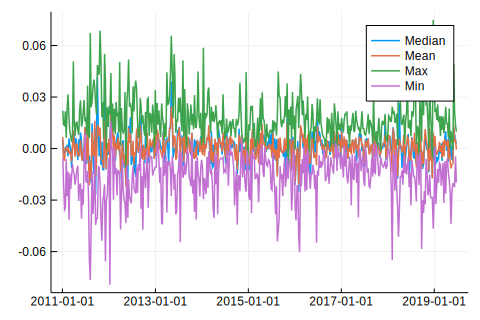

In [9]:
prettyplot(twkmerge)

# Task 5 (10 points)
This excercise is for ambitious students who would like to receive a high mark. Plot the autocorrelation function (up to lag 100) for the returns on the equally weighted portfolio that you have calculated including 99% confidence bands.

In [8]:
using StatsBase
Rportfolio = mean((stock_f[2:end,:] ./ stock_f[1:end-1,:] .- 1), dims = 2)
plags = 1:100
portcorr = autocor(Rportfolio,plags)
T = size(stock_f,1)

println("Autocorrelations of the excess returns in Rportfolio")
println("\n     lag   autocorrr    t-stat")
printmat([plags portcorr sqrt(T)*portcorr])

Autocorrelations of the excess returns in Rportfolio

     lag   autocorrr    t-stat


     1.000    -0.015    -0.678
     2.000     0.008     0.368
     3.000    -0.039    -1.779
     4.000    -0.027    -1.253
     5.000    -0.040    -1.855
     6.000    -0.027    -1.241
     7.000     0.033     1.536
     8.000     0.007     0.329
     9.000    -0.021    -0.987
    10.000     0.003     0.147
    11.000     0.017     0.782
    12.000     0.012     0.561
    13.000    -0.042    -1.919
    14.000     0.011     0.486
    15.000    -0.001    -0.037
    16.000     0.021     0.946
    17.000     0.035     1.631
    18.000    -0.028    -1.293
    19.000     0.011     0.528
    20.000     0.014     0.664
    21.000    -0.008    -0.354
    22.000     0.005     0.215
    23.000     0.009     0.398
    24.000     0.023     1.052
    25.000    -0.037    -1.684
    26.000     0.012     0.574
    27.000    -0.006    -0.270
    28.000    -0.008    -0.369
    29.000     0.013     0.606
    30.000    -0.013    -0.602
    31.000    -0.038    -1.760
    32.000    -0.003    -0.140
    33.0

# Task 6 (10 points)
Suppose that you want to index the daily returns on your equally weighted portfolio not by the second but by the first day. That is you want the time series to start on 2011-01-03 rather than 2011-01-04, which was done automatically when applying  ``diff(log())`` to a time array. The task is to shift all dates by one day backward.

Print out the first and last few rows of the modified time series object using the functions ``head()`` and ``tail()``.

Hint: start by looking at the Julia documentation of ``TimeSeries.jl``.

In [68]:
portr = (sum(diff(log.(stock_t)),dims=2)./3).*100;
rdf = DataFrame(portr)
rdfadj = rdf.timestamp .-= Dates.Day(1)
rt = TimeArray(rdf, timestamp = :timestamp) #Convert data frame to time array
rtn = TimeSeries.rename(rt,"Equally-Weighted Portfolio Returns") #Rename column name
display(TimeSeries.head(rtn,10))
display(TimeSeries.tail(rtn,10))

10×1 TimeArray{Float64,1,Date,Array{Float64,1}} 2011-01-03 to 2011-01-17
│            │ Equally-Weighted Portfolio Returns │
├────────────┼────────────────────────────────────┤
│ 2011-01-03 │ 0.4755                             │
│ 2011-01-04 │ 0.5113                             │
│ 2011-01-05 │ 2.2071                             │
│ 2011-01-06 │ -0.5295                            │
│ 2011-01-09 │ -0.3767                            │
│ 2011-01-10 │ -2.0304                            │
│ 2011-01-11 │ 1.4001                             │
│ 2011-01-12 │ -1.8302                            │
│ 2011-01-13 │ 0.3184                             │
│ 2011-01-17 │ 0.013                              │

10×1 TimeArray{Float64,1,Date,Array{Float64,1}} 2019-06-16 to 2019-06-27
│            │ Equally-Weighted Portfolio Returns │
├────────────┼────────────────────────────────────┤
│ 2019-06-16 │ 1.3906                             │
│ 2019-06-17 │ 1.1762                             │
│ 2019-06-18 │ 0.226                              │
│ 2019-06-19 │ -0.4635                            │
│ 2019-06-20 │ 0.435                              │
│ 2019-06-23 │ 0.0705                             │
│ 2019-06-24 │ -1.9716                            │
│ 2019-06-25 │ 0.3071                             │
│ 2019-06-26 │ 0.9785                             │
│ 2019-06-27 │ 0.2897                             │

┌ Warning: `rename(ta::TimeArray, col::String)` is deprecated, use `rename(ta::TimeArray, Symbol(col))` instead.
│   caller = top-level scope at In[68]:5
└ @ Core In[68]:5
